# My Pandas template and cheat sheet

Pandas is a newer Package built on top of Numpy to provide an efficient implementation of DataFrames. DataFrames are multidimentional arrays with attached rows and columns labels.

The problem with DataFrames is that they can come with heterogeousneous type and/or missing data. Pandas allows us to handle those and other problems

In [2]:
#we import pandas as pd
import numpy as np
import pandas as pd

# Pandas Objects
Series, DataFrames and Index

In [6]:
# a Pandas series is a one dimensional array of indexed data
data = pd.Series([0.25, 0.50, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [7]:
#as the output shows a  Series wraps both values and indices, we can access values
# as follows

data.values
#this should return a simple array like object

array([ 0.25,  0.5 ,  0.75,  1.  ])

In [8]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [9]:
data[0]

0.25

In [10]:
data[3]

1.0

In [11]:
data[:2]

0    0.25
1    0.50
dtype: float64

In [12]:
data[:2].values

array([ 0.25,  0.5 ])

In [14]:
#the difference between series and numpy arrays is the explicitly defined index
data = pd.Series([1, 2, 4, 6], index = ['a', 'b', 'c', 'd'])
data

a    1
b    2
c    4
d    6
dtype: int64

In [15]:
data['b']

2

In [16]:
#in this way Series are a bit like Python Dictionaries, the difference is that Series 
#are type specific, we can create series from dictionaries
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [18]:
population['California': 'New York']

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
dtype: int64

# Pandas DataFrames
a DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names

In [19]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}

area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [20]:
states = pd.DataFrame({'population': population, 'area': area})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [21]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [22]:
states.columns

Index(['area', 'population'], dtype='object')

In [23]:
# Where a dictionary maps a key to a value, 
# a DataFrame maps a column name to a Series of column data
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [24]:
states['area']['New York']

141297

In [26]:
#there are several ways of constructing a DataFrame, some of the most useful 
#arguments are columns and index
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.587820,0.065964
b,0.170002,0.971745
c,0.448199,0.487761


# Pandas Index

In [27]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [29]:
#The Index works in many ways like an array and hav attributes like size
#shape, ndim and dtype. The difference between Index and Numpy Arrays
# is that Indices are immutables
ind[1] = 8
#this would result in an error

TypeError: Index does not support mutable operations

In [31]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

print(indA & indB) #intersection
print(indA | indB) #unions
print(indA ^ indB) #Symmetric difference

Int64Index([3, 5, 7], dtype='int64')
Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
Int64Index([1, 2, 9, 11], dtype='int64')


# Data Indexing and Selection

In [34]:
#For series
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [35]:
print(data['b'])
print('a' in data)

0.5
True


In [36]:
#We can even extend Series
data['e'] = 1.56
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.56
dtype: float64

In [37]:
#slicing by explicit index
data['a': 'd']

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [38]:
#slicing by impllicit integer
data[1: 4]

b    0.50
c    0.75
d    1.00
dtype: float64

In [39]:
#masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [40]:
#fancy indexing
data[['a', 'e']]

a    0.25
e    1.56
dtype: float64

# Notice

when slicing with explicit index the last index is included, while when Slicing by implicit integer the last index is exluded, this can be a source of confusion if the explicit indices are a list of integer.
To provide this confusion Pandas provides us with the .loc and .iloc methods, using the .loc allows us to always reference the explicit index

In [41]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [45]:
print(data[1]) #explicit index when indexing
print(data[1: 3]) #implicit index when slicing

data[1]: a
data[1:3:] 3    b
5    c
dtype: object


In [46]:
data.loc[1]

'a'

In [47]:
data.loc[1:3]

1    a
3    b
dtype: object

In [48]:
data.iloc[1]

'b'

In [49]:
data.iloc[1:3]

3    b
5    c
dtype: object

# Data selection in DataFrame

In [50]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                         'New York': 19651127, 'Florida': 19552860,
                         'Illinois': 12882135})

data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [51]:
#dictionary style indexing
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [52]:
#or attribute style
data.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [53]:
data.area is data['area']

True

In [54]:
#the DataFrame object have a .pop() method so conflict when comparing data['pop']...
data.pop is data['pop']

False

In [56]:
#extending our DataFrame
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


In [57]:
#DataFrame a a two-dimensional array
data.values

array([[  4.23967000e+05,   3.83325210e+07,   9.04139261e+01],
       [  1.70312000e+05,   1.95528600e+07,   1.14806121e+02],
       [  1.49995000e+05,   1.28821350e+07,   8.58837628e+01],
       [  1.41297000e+05,   1.96511270e+07,   1.39076746e+02],
       [  6.95662000e+05,   2.64481930e+07,   3.80187404e+01]])

In [58]:
#we can transpose the full DataFrame to swap rows and columns
data.T

,California,Florida,Illinois,New York,Texas
area,4.239670e+05,1.703120e+05,1.499950e+05,1.412970e+05,6.956620e+05
pop,3.833252e+07,1.955286e+07,1.288214e+07,1.965113e+07,2.644819e+07
density,9.041393e+01,1.148061e+02,8.588376e+01,1.390767e+02,3.801874e+01


In [59]:
data.values[0]

array([  4.23967000e+05,   3.83325210e+07,   9.04139261e+01])

In [60]:
#like with Series DataFrame object comes with a .loc and .iloc methods
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [61]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [62]:
#we can combine masking and fancy indeing inside of the loc and iloc methods
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
Florida,19552860,114.806121
New York,19651127,139.076746


# UFuncs in Pandas

In [63]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [64]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                 columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [66]:
#we can apply Numpy ufuncs on either of these objects it will work
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [67]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [68]:
#for binary operations Pandas will align indices in the process
#Suppose we want the top three US states by are and the top US states by population
#using these two different data sources
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [69]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [70]:
#the resut is the union of the two data sources
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [72]:
#NaN is not always a desired result, so instead we can use the add methods
A.add(B, fill_value = 0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [73]:
#the same rules apply to DataFrames

# Handling missing Data

In [74]:
#None is one of Python ways to express the nullness of a value, the problem with 
#None is that we will get errors while perfrming some np aggreagate function...
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [75]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [76]:
#to handle this first problm we instead use np.nan
vals2 = np.array([1, np.nan, 3, 4])
vals2

array([  1.,  nan,   3.,   4.])

In [79]:
print(1 + np.nan)
print( 0 * np.nan)

nan
nan


In [80]:
#aggregate functions will work in this case but the result in not useful
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [84]:
#we can instead use np.nansum() to ignore the nan values
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)
#another problem is that nan is a floating point and won't work with integers or strings


(8.0, 1.0, 4.0)

Pandas treas NaN as essentially interchangeable for indicating missing or null values. There are several useful methods for detecting, removing, and replacing null values in Pandas
- isnull() generate a boolean mask indicating missing values
- notnull() opposite of isnull
- dropna() return a filtred version of the data
- fillna() return a copy of the data with missing values filled or imputed

In [86]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [87]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [88]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [92]:
data.dropna()

0        1
2    hello
dtype: object

In [93]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [94]:
#we cannot drop a single value from a DataFrame so dropna will remove the full row
df.dropna()

,0,1,2
1,2.0,3.0,5


In [95]:
#or we can dropna along columns
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [98]:
#we can specify the how argument to force drop only rows/columns that are all
# null values
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [99]:
df.dropna(axis = 'columns', how = 'all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [101]:
#the parameter thresh allow us to specify how much non null values min before drop
df.dropna(axis = 'rows', thresh = 3)
#because the first and last rows contains only 2 non null values they will be removed


,0,1,2,3
1,2.0,3.0,5,NaN


In [102]:
#filling null values
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [104]:
data.fillna(0)
#should replace all null values with 0

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [105]:
#we ca specify a forward-fill to propagate the previous values forward
data.fillna(method = 'ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [106]:
#or back fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [108]:
#the same applies for DataFrames +  we can specify the axis
df.fillna(method='ffill', axis = 1)
#if there is no previous value then it will be kept to null

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# Hierarchical Indexing


Up to this point we’ve been focused primarily on one-dimensional and two-dimensional data, stored in Pandas Series and DataFrame objects, respectively. Often it is useful to go beyond this and store higher-dimensional data—that is, data indexed by more than one or two keys. While Pandas does provide Panel and Panel4D objects that natively handle three-dimensional and four-dimensional data (see “Panel Data”), a far more common pattern in practice is to make use of hierarchical indexing (also known as multi-indexing) to incorporate multiple index levels within a single index. In this way, higher-dimensional data can be compactly represented within the familiar one-dimensional Series and two-dimensional DataFrame objects.

In [109]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [111]:
pop[('California', 2010):('Texas', 2000)]
#this is the bad way and will result in a lot of problems in some cases

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [113]:
# A better way is to use pandas multiindex
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [116]:
pop = pop.reindex(index)
pop
#now this is way better

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [117]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [118]:
#we can store this data using dataframe, dates here are an additional dimention to do so
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [119]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [120]:
#this will prove useful in higher dimentions
pop_df = pd.DataFrame({'total': pop,
                      'under18':[9267089, 9284094,4687374, 4318033,
                                 5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [122]:
# the reason this is useful is we still can use all the ufuncs
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


In [123]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.922246  0.390129
  2  0.066701  0.990479
b 1  0.981496  0.683191
  2  0.617155  0.442542

In [124]:
data = {('California', 2000): 33871648,('California', 2010): 37253956,
        ('Texas', 2000): 20851820,('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [125]:
#Explicit multiIndex constructor
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [126]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [127]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [128]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [129]:
#MultiIndex level names
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [130]:
#MultiIndex for columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], 
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

#mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      55.0  39.0  40.0  36.0  12.0  37.8
     2      37.0  36.6  46.0  35.8  44.0  37.5
2014 1      47.0  36.6  37.0  36.2  35.0  36.7
     2      31.0  37.2  50.0  37.3  47.0  35.9

In [131]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      40.0  36.0
     2      46.0  35.8
2014 1      37.0  36.2
     2      50.0  37.3

In [132]:
#indexing Multiindex series
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [133]:
pop['California', 2000]

33871648

In [134]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [135]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [136]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [137]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [138]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [139]:
#MULTIPLY INDEXED DATAFRAMES
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      55.0  39.0  40.0  36.0  12.0  37.8
     2      37.0  36.6  46.0  35.8  44.0  37.5
2014 1      47.0  36.6  37.0  36.2  35.0  36.7
     2      31.0  37.2  50.0  37.3  47.0  35.9

In [140]:
health_data['Guido', 'HR']

year  visit
2013  1        40.0
      2        46.0
2014  1        37.0
      2        50.0
Name: (Guido, HR), dtype: float64

In [141]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      55.0  39.0
     2      37.0  36.6

In [142]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        55.0
      2        37.0
2014  1        47.0
      2        31.0
Name: (Bob, HR), dtype: float64

In [144]:
 # bad: health_data.loc[(:, 1), (:, 'HR')]
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,55.0,40.0,12.0
2014,1,47.0,37.0,35.0


In [145]:
#Data Aggregations on Multi-Indices
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      55.0  39.0  40.0  36.0  12.0  37.8
     2      37.0  36.6  46.0  35.8  44.0  37.5
2014 1      47.0  36.6  37.0  36.2  35.0  36.7
     2      31.0  37.2  50.0  37.3  47.0  35.9

In [147]:
data_mean = health_data.mean(level='year')
data_mean

subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     46.0  37.8  43.0  35.90  28.0  37.65
2014     39.0  36.9  43.5  36.75  41.0  36.30

In [148]:
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,39.000000,37.116667
2014,41.166667,36.650000


# Combining Datasets: concat and Append

Some of the most interesting studies of data come from combining different data sources. These operations can involve anything from very straightforward concatenation of two different datasets, to more complicated database-style joins and merges that correctly handle any overlaps between the datasets. Series and DataFrames are built with this type of operation in mind, and Pandas includes functions and methods that make this sort of data wrangling fast and straightforward.


In [149]:
#For convenience, we’ll define this function, which creates a DataFrame of a
#particular form that will be useful below

def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [150]:
#concatenating numpy arrays
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [152]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [153]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [160]:
#By default the concatenation takes place row-wise within the DataFrame

df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])

print(df3, "\n") 
print(df4, "\n")
print(pd.concat([df3, df4], axis= 1))

    A   B
0  A0  B0
1  A1  B1 

    C   D
0  C0  D0
1  C1  D1 

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


In [168]:
#concatenation with joins
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

print(df5)
print(df6)
print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [169]:
print(df5)
print(df6)
print(pd.concat([df5, df6], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [170]:
print(df5)
print(df6)
print(pd.concat([df5, df6], join_axes=[df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


In [171]:
# the append() method can also work to concatenate
print(df1)
print(df2)
print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


# Combining Datasets: Merge and Join
One essential feature offered by Pandas is its high-performance, in-memory join and merge operations

In [174]:
#one to one join
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
print(df1)
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [173]:
#to combine this information into a single DataFrame we can use pd.merge
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [175]:
# MANY-TO-ONE JOINS
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3)
print(df4)
print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [176]:
# Many to many joins
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
print(df1)
print(df5)
print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


In [177]:
# we can explicitly specify the name of the key column using the on keyword
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [178]:
# At times you may wish to merge two datasets with different column names; 
#for example, we may have a dataset in which the employee name is labeled as
#“name” rather than “employee”. In this case, we can use the left_on and right_on
#keywords to specify the two column names:

df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

# The result will have a redundant column that we can drop if desired

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [179]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [180]:
#Sometimes, rather than merging on a column, you would instead like to merge on an index

df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [181]:
print(df1a); print(df2a);
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Lisa      Engineering       2004
Bob        Accounting       2008
Jake      Engineering       2012
Sue                HR       2014


In [182]:
#For convenience, DataFrames implement the join() method,
#which performs a merge that defaults to joining on indices

print(df1a); print(df2a); print(df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [183]:
# we can combine both methods to get the desired result
print(df1a); print(df3);
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


In [186]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [187]:
#  An outer join returns a join over the union of the input columns
print(df6)
print(df7)
print(pd.merge(df6, df7, how='outer'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [188]:
# The left join and right join return join over the left entries and right entries
print(df6); print(df7); print(pd.merge(df6, df7, how='left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


In [190]:
# Overlapping Column Names: we may end up in a case where your two input
#DataFrames have conflicting column names

df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [191]:
print(df8); print(df9);
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


# Example: US States Data

In [194]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

print(pop.head(), "\n")
print(areas.head(), "\n")
print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0 

        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707 

        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [196]:
#goal: rank US states and territories by their 2010 population density
merged = pd.merge(pop, abbrevs, how='outer', left_on='state/region',
                 right_on='abbreviation')

merged = merged.drop('abbreviation', 1) # duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [197]:
#let's check whether there are any mismatches here,
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [199]:
# some of population is null
merged[merged['population'].isnull()]

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN
2453,PR,under18,1993,NaN,NaN
2454,PR,under18,1992,NaN,NaN
2455,PR,total,1992,NaN,NaN
2456,PR,under18,1994,NaN,NaN
2457,PR,total,1994,NaN,NaN


In [201]:
#data on Puerto Rico prior to year 2000 is null
#some of the new state entries also are null
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [202]:
#we can easily fix that
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [205]:
#so only the population problem left
#now we canmerge with the area data
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [206]:
#check if any null values in the new data
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [210]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

We see that our areas DataFrame does not contain the area of the United States as a whole. We could insert the appropriate value (using the sum of all state areas, for instance), but in this case we’ll just drop the null values because the population density of the entire United States is not relevant to our current discussion

In [211]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [212]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [213]:
data2010.set_index('state', inplace = True)
density = data2010['population'] / data2010['area (sq. mi)']

In [214]:
density.sort_values(ascending=False, inplace = True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

The result is a ranking of US states plus Washington, DC, and Puerto Rico in order of their 2010 population density

In [215]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

# Aggregation and grouping

In [217]:
#Planets data available via seaborn package
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [218]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [219]:
#aggreagate functions works the same way they did with np arrays
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [220]:
ser.sum()

2.811925491708157

In [221]:
ser.mean()

0.5623850983416314

In [222]:
#for dataframes the results is returned per column by default
df = pd.DataFrame({'A': rng.rand(5),
                  'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [223]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [224]:
#obviously we just should change the axis parameter
df.mean(axis = 1)

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [226]:
#describe method is a pretty useful aggregate function that computes several useful
#aggregates for each column
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## DataFrames and Series aggregate functions:
- count() total number of items
- first(), last()  first and last item
- mean(), median()
- min(), max()
- std(), var() standard deviation and variance
- mad() mean absolute deviation
- prod() product of all items
- sum() sum of all items

next is split, apply, combine
- split: breaking up a DataFrame
- apply: computing a certain function
- combine: merges results of the operations into an array
these methods are very useful when combined with each other

In [228]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [229]:
df.groupby('key')

In [230]:
#alone groupby does nothing special, but it shines when combined with an agg func
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [233]:
#we can select just a certain column and apply the agg func on it
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [236]:
#we can even use methods like describe
planets.groupby('method')['year'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [237]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,4
1,B,1,0
2,C,2,9
3,A,3,5
4,B,4,8
5,C,5,0


In [238]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     4    4.5   5
B       1    2.5   4     0    4.0   8
C       2    3.5   5     0    4.5   9

In [239]:
df.groupby('key').aggregate({'data1': 'min',
                            'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,8
C,2,9


In [240]:
#filtering
def filter_func(x):
    return x['data2'].std() > 4

print(df)
print(df.groupby('key').std())
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      4
1   B      1      0
2   C      2      9
3   A      3      5
4   B      4      8
5   C      5      0
       data1     data2
key                   
A    2.12132  0.707107
B    2.12132  5.656854
C    2.12132  6.363961
  key  data1  data2
1   B      1      0
2   C      2      9
4   B      4      8
5   C      5      0


In [241]:
#filter with lambdas
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,-0.5
1,-1.5,-4.0
2,-1.5,4.5
3,1.5,0.5
4,1.5,4.0
5,1.5,-4.5


In [242]:
#apply works like filter
def norm_by_data2(x):
    x['data1'] /= x['data2'].sum()
    return x

print(df)
print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      4
1   B      1      0
2   C      2      9
3   A      3      5
4   B      4      8
5   C      5      0
  key     data1  data2
0   A  0.000000      4
1   B  0.125000      0
2   C  0.222222      9
3   A  0.333333      5
4   B  0.500000      8
5   C  0.555556      0


# Pivot Table

In [243]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [246]:
#pivot table by hand
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [249]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [252]:
#multilevel pivot table
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [255]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            [0, 14.454]                     (14.454, 512.329]            \
class                 First    Second     Third             First    Second   
sex    age                                                                    
female (0, 18]          NaN  1.000000  0.714286          0.909091  1.000000   
       (18, 80]         NaN  0.880000  0.444444          0.972973  0.914286   
male   (0, 18]          NaN  0.000000  0.260870          0.800000  0.818182   
       (18, 80]         0.0  0.098039  0.125000          0.391304  0.030303   

fare                       
class               Third  
sex    age                 
female (0, 18]   0.318182  
       (18, 80]  0.391304  
male   (0, 18]   0.178571  
       (18, 80]  0.192308

In [256]:
#additional parameters
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

survived                     fare                      
class     First Second Third       First     Second      Third
sex                                                           
female       91     70    72  106.125798  21.970121  16.118810
male         45     17    47   67.226127  19.741782  12.661633

# Example: Birthrate Data

In [258]:
births = pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [260]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


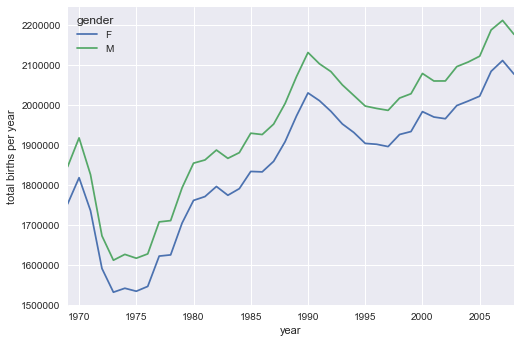

In [261]:
#in every decade male births are higher than female births

%matplotlib inline
import matplotlib.pyplot as plt
sns.set() #use Seaborn styles
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()
plt.ylabel('total births per year')

In [263]:
#cleaning data
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [264]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [265]:
#set day column to integer
births['day'] = births['day'].astype(int)

In [267]:
#create a datatime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year + 
                             100 * births.month + 
                             births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


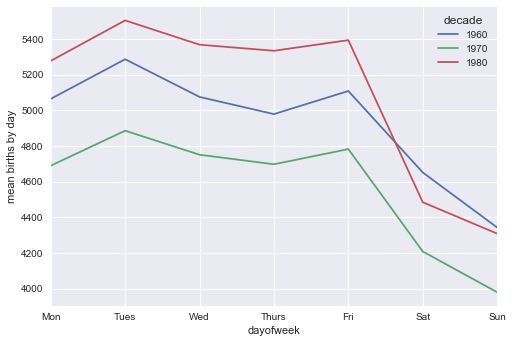

In [269]:
import matplotlib as mpl

births.pivot_table('births', index = 'dayofweek',
                  columns = 'decade', aggfunc = 'mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [270]:
#funny but births are more common on weekdays than on weekends

#mean number of births by the day of the year
births_by_date = births.pivot_table('births',
                                   [births.index.month, births.index.day])
births_by_date.head()

1  1    4009.225
   2    4247.400
   3    4500.900
   4    4571.350
   5    4603.625
Name: births, dtype: float64

In [271]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.head()

2012-01-01    4009.225
2012-01-02    4247.400
2012-01-03    4500.900
2012-01-04    4571.350
2012-01-05    4603.625
Name: births, dtype: float64

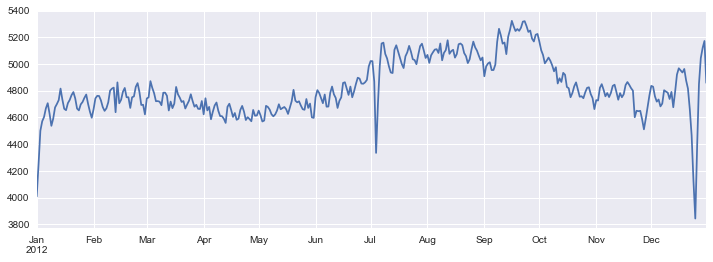

In [272]:
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax);

# Vectorized String Operations
Pandas String Operations

In [273]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]
#this may result in error if null falues for example

['Peter', 'Paul', 'Mary', 'Guido']

In [275]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [276]:
#pandas comes in to the rescue in these cases using the str attr
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [277]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

### Methods similar to native Python str methods

len(), lower(), translate(), islower(), ljust(), upper(), startswith(), isupper(), rjust(), find(), endswith(), isnumeric(), center(), rfind(), isalnum(), isdecimal(), zfill(), index(), isalpha(), split(), strip(), rindex(), isdigit(), rsplit(), rstrip(), capitalize(), isspace(), partition(), lstrip(), swapcase(), istitle(), rpartition()

In [278]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                          'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [279]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [280]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [281]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [282]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

### METHODS USING REGULAR EXPRESSIONS

In addition, there are several methods that accept regular expressions to examine the content of each string element, and follow some of the API conventions of Python’s built-in re module
- re.match()
- re.extract()
- re.findall()
- re.replace()
- re.contains()
- re.count()
- re.split()

In [284]:
monte.str.extract('([A-Za-z]+)')

C:\Users\khalil\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [285]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

# Working with Time Series

In [286]:
# Python native data and time module reside in the built-in datetime module
from datetime import datetime
datetime(year = 2015, month =7, day = 4)

datetime.datetime(2015, 7, 4, 0, 0)

In [287]:
# dateutil modul helps parsing dates in string formats....
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [288]:
#finally, when having the datetime object we can do things like printing only the day
date.strftime('%A')

'Saturday'

In [290]:
#numpy datetime object
date = np.array('2015-07-04', dtype = np.datetime64)
date

array(datetime.date(2015, 7, 4), dtype='datetime64[D]')

In [291]:
# we can perform vectorized operations over it
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'], dtype='datetime64[D]')

In [292]:
#finally datetime in pandas
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [293]:
date.strftime('%A')

'Saturday'

In [296]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [299]:
#indenxing by time
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                        '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index = index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [300]:
data['2014-07-04': '2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [302]:
#we can pass only the year
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [303]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                        '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [304]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [305]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [306]:
#ranges
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [307]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [308]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [309]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [311]:
#To increase performance Pandas comes with eval and query methods
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

In [312]:
%timeit df1 +df2 +df3 +df4

10 loops, best of 3: 86.8 ms per loop


In [313]:
#we can compute the same result using eval
%timeit pd.eval('df1 +df2 +df3 +df4')

10 loops, best of 3: 38.2 ms per loop


In [314]:
#The eval() version of this expression is about 50% faster
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

In [315]:
# we can perform arithmitic operations using eval
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [316]:
#comparison operations
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [317]:
# pd.eval() supports the & and | bitwise operators
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [318]:
#In addition, it supports the use of the literal and and or in Boolean expressions
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

In [319]:
#access to attr
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

In [320]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [321]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [322]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

In [323]:
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [324]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In [326]:
#@ character marks a variable name rather than a column name
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

In [327]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [328]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True